# Description (data of version September 2016)

### Files
The files for_yandex_x.root contain a single TTree called `T` that has all of the feautres we want to consider for various jet-tagging algorithms. The values of x mean:
* 0 = light parton,
* 4 = charm,
* 5 = beauty, 
i.e. 5 is b-jets, 4 is c-jets, and 0 is everything else. 

### Initial selection
Only jets with measured `pt > 20 GeV` and `2.2 < eta < 4.2` are kept in these samples. 

### Goal: jet tagging algorithms
We want to start by considering the following taggers:

- An SV tagger that requires an SV in the jet and uses features similar to what we used in the LHCb Run 1 tagger. This will now include anything given below that starts with SV, along with the feature SVPT / JetPT.  

- An SV tagger that requires an SV in the jet but uses not only SV features, but also whatever else is useful.

- A muon tagger that requires a muon in the jet and uses only Mu features, along with MUPT / JetPT. 

- A hardest-track tagger that uses features of the highest-pt track in the jet, along with HardPT / JetPT.

- A tagger that requires zero SVs, but can use whatever else is useful. 

In each case, we want to consider separation of b, c, and light, though some of these may only be useful for b OR c vs light.

To remind you, in Run 1 the SV tagger used 
* SVM,
* SVMCor, 
* SVMINPERP, 
* SVPT/JetPT, 
* SVDR, 
* SVN, 
* SVNJ, 
* abs(SVQ), 
* log(SVSumIPChi2). 


### Features
The features kept for each jet are list below with descriptions. 

#### True features
Features that starts with "True" is truth-level information we can use for labeling, but cannot be used in the classification algorithm since in experimental data we don't have this. 

- TrueParton is the truth-level parton that the jet matches to. This should be +-5(+-4) for all jets in the beauty(charm) file, and various numbers that correspond to u,d,s,g for light jets.

- TrueMaxBPT is the true maximum b-hadron pt within the jet. This should be zero except for b-jets.

- TrueMaxCPT is the true maximum c-hadron pt within the jet. This should be zero for light jets. It can be non-zero for b-jets since many contain a b --> c decay. 

- TrueJet(Px,Py,Pz,E) is the true 4-momentum of the jet. 

#### Jet properties
Features that start with "Jet" are properities that all jets have.

- Jet(PT,ETA) is the measured jet pt(eta).

- JetSigma(1,2) is the "jet width" along the major and minor axes. 

- JetQ is the "jet charge".

- JetMult is the total number of charged and neutral particles in the jet. 

- JetNChr is the number of charged particles in the jet. 

- JetNNeu is the number of neutral particles in the jet. 

- JetPTD is another jet width type feature. 

#### Secondary vertex properties
Features that start with "SV" are only set for jets that have a secondary vertex associated to them. 

- NSV is the number of SVs in the jet. Only the one with the highest pt is given in the SV features.

- SV(X,Y,Z) is the position.

- SVPerp is `(SVX**2 + SVY**2)**0.5`.

- SV(Px,Py,Pz,E) is the 4-momentum of all tracks that make up the SV.

- SV(PT,ETA) are the transverse component and eta of the 4-momentum.

- SVM is the invariant mass.

- SVMCor is the corrected mass. 

- SVMINPERP is the minimum perp location of all 2-body SV contained in the n-body SV.

- SVDR is DeltaR between the direction of flight (PV to SV vector) and the jet axis.

- SVN is the number of tracks in the SV.

- SVNJ is the number of tracks in the SV that are also in the jet.

- SVQ is the net charge of the tracks in the SV (we usually only use its absolute value).

- SVSumIPChi2 is the sum of the IP chi2 of all tracks in the SV.

- SVTZ is the pseudo lifetime of the SV. 

- SVMINIPCHI2 is the min value of IP chi2 of all tracks in the SV.

- SVGhostMax is the max value of the ghost prob of all tracks in the SV.


#### Muon properties
Features that start with "Mu" are only for jets that contain a muon, which is defined as a track in the jet with ProbNNmu > 0.5 and PT > 500 MeV. 

- NMU is the number of muons in the jet.  If more than one, then only the one with the highest PT is reported in the Mu features. 

- MuPT is the pt of the muon.

- MuIPChi2 is the IP chi2 of the muon.

- MuDR is DeltaR between the muon and the jet axis. 

- MuPNN is ProbNNmu for the muon.


#### Properties of the highest-pt track in the jet
Features that start with "Hard" are for the highest-pt track in the jet.

- HardPT is its pt.

- HardIPChi2 is its IP chi2.

- HardDR is DeltaR between the hardest track and the jet axis. 


#### Other features

- PV(X,Y,Z) is the PV location.

- NDispl(6,9,16) is the number of tracks in the jet that have IP chi2 > (6,9,16).  Clearly these are highly correlated, so perhaps we should only consider using one of them.



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import root_numpy
import pandas

import os, sys
sys.path.append('utils')

import utils

## Read the data

In [3]:
b_jets = pandas.DataFrame(root_numpy.root2array('data/datasets_2016_Sept/for_yandex_5.root', treename='T'))
c_jets = pandas.DataFrame(root_numpy.root2array('data/datasets_2016_Sept/for_yandex_4.root', treename='T'))
light_jets = pandas.DataFrame(root_numpy.root2array('data/datasets_2016_Sept/for_yandex_0.root', treename='T'))

In [4]:
print len(b_jets), sum(b_jets.TrueParton == 5), sum(b_jets.TrueMaxBPT != 0), sum(b_jets.TrueMaxCPT != 0)
print len(c_jets), sum(c_jets.TrueParton == 4), sum(c_jets.TrueMaxBPT != 0), sum(c_jets.TrueMaxCPT != 0)
print len(light_jets), sum(light_jets.TrueParton != -1000), sum(light_jets.TrueMaxBPT != 0), sum(light_jets.TrueMaxCPT != 0)

1176550 1162488 1176550 1101842
1268093 1253101 0 1268093
328977 328977 0 0


In [5]:
b_jets.head()

,TrueParton,TrueMaxBPT,TrueMaxCPT,TrueJetPx,TrueJetPy,TrueJetPz,TrueJetE,JetPT,JetEta,JetSigma1,...,NDispl9,NDispl16,MuPT,MuIPChi2,MuDR,MuPNN,NMu,HardPT,HardIPChi2,HardDR
0,5,17633.682312,6740.255618,-5755.97,-16674.51,515023.76,515349.118636,24319.124790,3.963454,0.167547,...,5,5,-1000,-1000,-1000,-1000,0,6490.685047,3034.382975,0.213897
1,5,14018.186474,7494.051081,25248.38,-6732.63,269911.29,271314.621876,23297.508840,3.005670,0.217980,...,4,4,-1000,-1000,-1000,-1000,0,2838.847081,486324.301619,0.051732
2,5,19639.972596,11968.533091,-19748.24,3521.12,89582.65,91888.056364,23719.662697,2.210880,0.170647,...,2,2,-1000,-1000,-1000,-1000,0,7316.954505,364.558259,0.138822
3,5,23047.556741,11952.634665,4457.80,-24709.15,169722.14,171713.585989,26006.902109,2.591552,0.123072,...,4,4,-1000,-1000,-1000,-1000,0,6009.983039,5697.853951,0.149840
4,5,15040.377664,5199.804785,-16446.17,-2246.46,243727.69,244340.283371,20309.128691,3.398945,0.073169,...,1,1,-1000,-1000,-1000,-1000,0,5930.803875,6.375019,0.058510


In [6]:
c_jets.head()

,TrueParton,TrueMaxBPT,TrueMaxCPT,TrueJetPx,TrueJetPy,TrueJetPz,TrueJetE,JetPT,JetEta,JetSigma1,...,NDispl9,NDispl16,MuPT,MuIPChi2,MuDR,MuPNN,NMu,HardPT,HardIPChi2,HardDR
0,4,0,6655.137192,21363.34,-753.02,291365.69,292258.158800,23664.823260,3.178848,0.219161,...,3,3,-1000,-1000,-1000,-1000,0,2480.731319,0.045586,0.203831
1,4,0,7000.954325,-24970.81,1297.54,289446.02,290653.950785,23060.565666,3.094483,0.159110,...,1,1,-1000,-1000,-1000,-1000,0,4405.179113,4.818843,0.189539
2,4,0,10219.198792,23036.25,-7024.74,120649.14,123295.340064,21913.679443,2.275844,0.182635,...,1,1,-1000,-1000,-1000,-1000,0,2736.975320,0.467383,0.105937
3,4,0,9941.712343,-6611.81,-20933.26,175855.81,177495.056633,28447.919150,2.634802,0.122404,...,2,0,-1000,-1000,-1000,-1000,0,4410.462580,1.656956,0.098638
4,4,0,15346.944879,2764.13,20619.88,232347.56,233343.063964,23583.855771,3.068167,0.104452,...,0,0,-1000,-1000,-1000,-1000,0,2973.561019,2.004937,0.039941


In [7]:
light_jets.head()

,TrueParton,TrueMaxBPT,TrueMaxCPT,TrueJetPx,TrueJetPy,TrueJetPz,TrueJetE,JetPT,JetEta,JetSigma1,...,NDispl9,NDispl16,MuPT,MuIPChi2,MuDR,MuPNN,NMu,HardPT,HardIPChi2,HardDR
0,1,0,0,-27319.74,47085.50,452825.60,456137.075572,48022.687206,2.814516,0.061062,...,1,1,-1000,-1000,-1000,-1000,0,18100.027402,212.532620,0.023844
1,1,0,0,13698.42,-28216.77,297734.11,299538.592824,25613.918725,2.950437,0.212729,...,2,2,-1000,-1000,-1000,-1000,0,3095.725746,0.807135,0.249287
2,21,0,0,-19886.68,11777.38,106293.22,108900.656144,28613.420596,2.227800,0.115453,...,3,3,-1000,-1000,-1000,-1000,0,5272.209989,0.599693,0.124837
3,21,0,0,36211.56,-28213.17,626404.72,628247.727743,33615.583226,3.265237,0.160689,...,5,5,-1000,-1000,-1000,-1000,0,3713.614958,1.136854,0.113097
4,21,0,0,-18730.86,16806.38,299692.72,300855.176970,27773.950744,3.133306,0.123675,...,2,1,-1000,-1000,-1000,-1000,0,4125.008380,11.233436,0.059609


In [8]:
true_features = filter(lambda x: x.startswith('True'), b_jets.columns)
SV_features = filter(lambda x: x.startswith('SV'), b_jets.columns)
jet_features = filter(lambda x: x.startswith('Jet'), b_jets.columns)
muon_features = filter(lambda x: x.startswith('Mu'), b_jets.columns)
hard_features = filter(lambda x: x.startswith('Hard'), b_jets.columns)
other_features = ['PVX', 'PVY', 'PVZ', 'NDispl6', 'NDispl9', 'NDispl16']

In [9]:
len(b_jets.columns) / 4

13

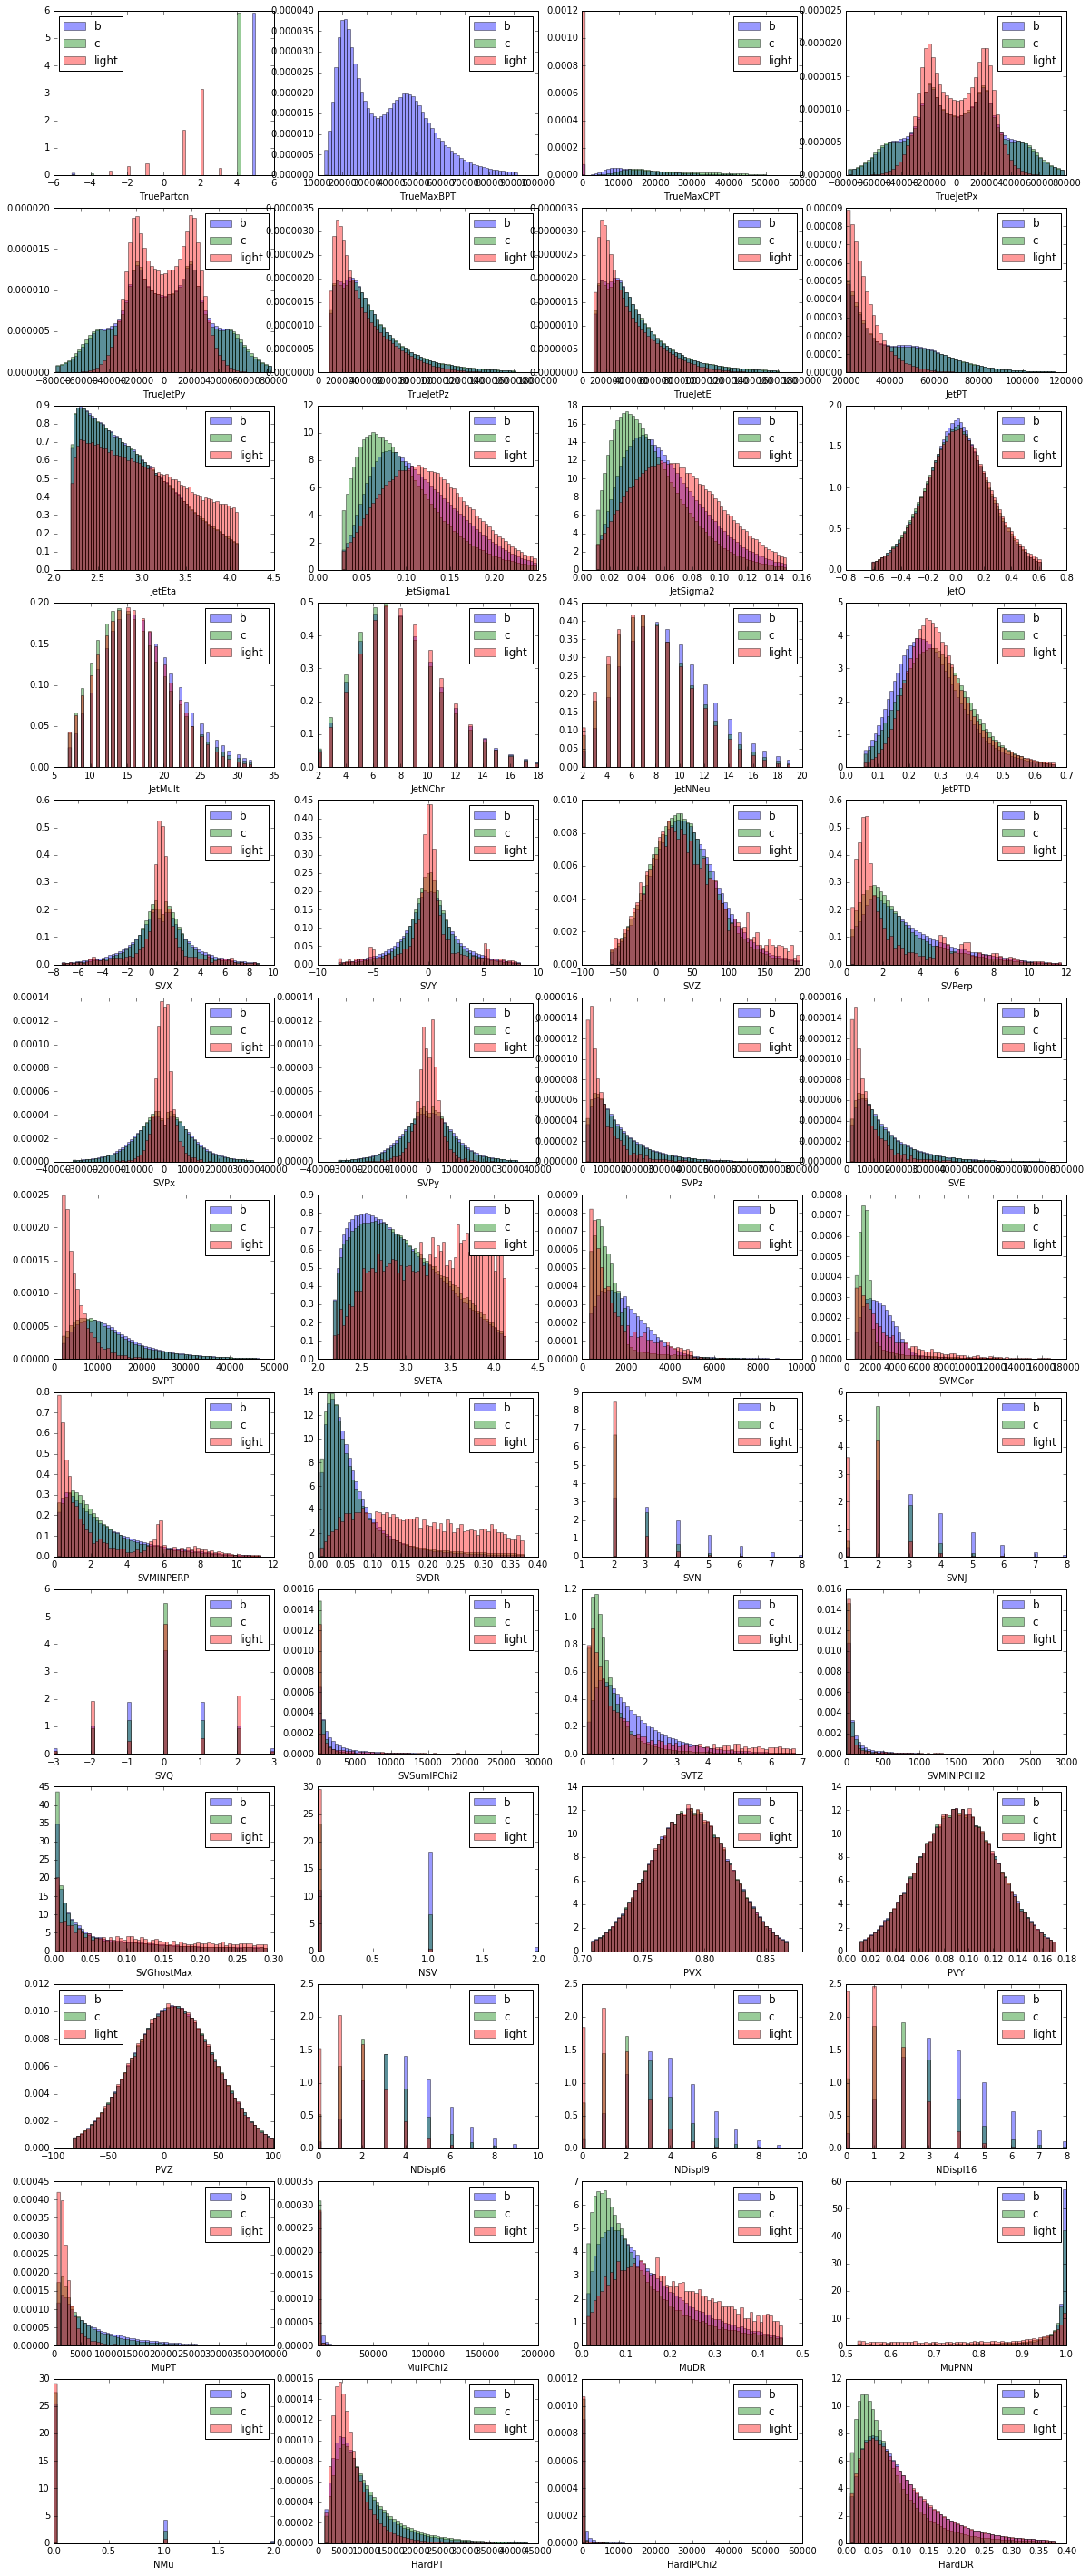

In [10]:
plt.figure(figsize=(20, 50))
kw_hist = {'normed': True, 'bins': 60, 'alpha': 0.4}
for n, name in enumerate(b_jets.columns):
    plt.subplot(13, 4, n + 1)
    val = numpy.percentile(b_jets[b_jets[name] != -1000][name].values, [1, 99])
    plt.hist(b_jets[b_jets[name] != -1000][name].values, label='b', range=val, **kw_hist)
    plt.hist(c_jets[c_jets[name] != -1000][name].values, label='c', range=val, **kw_hist)
    plt.hist(light_jets[light_jets[name] != -1000][name].values, range=val, label='light', **kw_hist)
    plt.legend(loc='best')
    plt.xlabel(name)

## SV tagger

An SV tagger that requires an SV in the jet and uses features similar to what we used in the LHCb Run 1 tagger. This will now include anything given below that starts with SV, along with the feature SVPT / JetPT.

#### Data Selection

In [11]:
sv_selection = '(TrueParton != -1000) & (NSV > 0)'

In [12]:
len(b_jets.query(sv_selection)), len(c_jets.query(sv_selection)), len(light_jets.query(sv_selection))

(740807, 288550, 5702)

In [13]:
data1 = pandas.concat([b_jets.query(sv_selection), c_jets.query(sv_selection), light_jets.query(sv_selection)], axis=0)
data1.head()

,TrueParton,TrueMaxBPT,TrueMaxCPT,TrueJetPx,TrueJetPy,TrueJetPz,TrueJetE,JetPT,JetEta,JetSigma1,...,NDispl9,NDispl16,MuPT,MuIPChi2,MuDR,MuPNN,NMu,HardPT,HardIPChi2,HardDR
0,5,17633.682312,6740.255618,-5755.97,-16674.51,515023.76,515349.118636,24319.124790,3.963454,0.167547,...,5,5,-1000,-1000,-1000,-1000,0,6490.685047,3034.382975,0.213897
1,5,14018.186474,7494.051081,25248.38,-6732.63,269911.29,271314.621876,23297.508840,3.005670,0.217980,...,4,4,-1000,-1000,-1000,-1000,0,2838.847081,486324.301619,0.051732
2,5,19639.972596,11968.533091,-19748.24,3521.12,89582.65,91888.056364,23719.662697,2.210880,0.170647,...,2,2,-1000,-1000,-1000,-1000,0,7316.954505,364.558259,0.138822
3,5,23047.556741,11952.634665,4457.80,-24709.15,169722.14,171713.585989,26006.902109,2.591552,0.123072,...,4,4,-1000,-1000,-1000,-1000,0,6009.983039,5697.853951,0.149840
5,5,22705.086617,15178.937919,-1314.14,25234.36,287425.77,288635.653309,29150.101859,3.143183,0.139819,...,6,4,-1000,-1000,-1000,-1000,0,5901.076491,379.628602,0.033013


#### Add new features

In [14]:
data1['SVPT/JetPT'] = data1.SVPT.values / data1.JetPT.values

#### Add Labels and Weights

In [15]:
data1['Label'] = [0] * len(b_jets.query(sv_selection)) + \
                 [1] * len(c_jets.query(sv_selection)) + \
                 [2] * len(light_jets.query(sv_selection))

data1['Weight'] = utils.compute_weights(data1['Label'].values)

#### Train, test splitting

In [16]:
from sklearn.model_selection import train_test_split
train1, test1 = train_test_split(data1, train_size=0.7, random_state=19)

In [17]:
print len(train1), len(test1)

724541 310518


In [18]:
numpy.unique(train1.Label.values)

array([0, 1, 2])

#### XGBoost training

In [19]:
from rep.estimators import XGBoostClassifier

features1 = SV_features + ['NSV', 'SVPT/JetPT']

xgb1 = XGBoostClassifier(nthreads=12, 
                        eta=0.05, 
                        n_estimators=1000, 
                        max_depth=6, 
                        subsample=0.5, 
                        min_child_weight=10, 
                        features=features1, 
                        colsample=0.7)

In [20]:
%%time 
xgb1.fit(train1.astype('float64'), train1.Label.values, sample_weight=train1.Weight.values)

CPU times: user 3h 11min 31s, sys: 10.6 s, total: 3h 11min 42s
Wall time: 23min 23s


XGBoostClassifier(base_score=0.5, colsample=0.7, eta=0.05,
         features=['SVX', 'SVY', 'SVZ', 'SVPerp', 'SVPx', 'SVPy', 'SVPz', 'SVE', 'SVPT', 'SVETA', 'SVM', 'SVMCor', 'SVMINPERP', 'SVDR', 'SVN', 'SVNJ', 'SVQ', 'SVSumIPChi2', 'SVTZ', 'SVMINIPCHI2', 'SVGhostMax', 'NSV', 'SVPT/JetPT'],
         gamma=None, max_depth=6, min_child_weight=10, missing=-999.0,
         n_estimators=1000, nthreads=12, num_feature=None, random_state=0,
         scale_pos_weight=1.0, subsample=0.5, verbose=0)

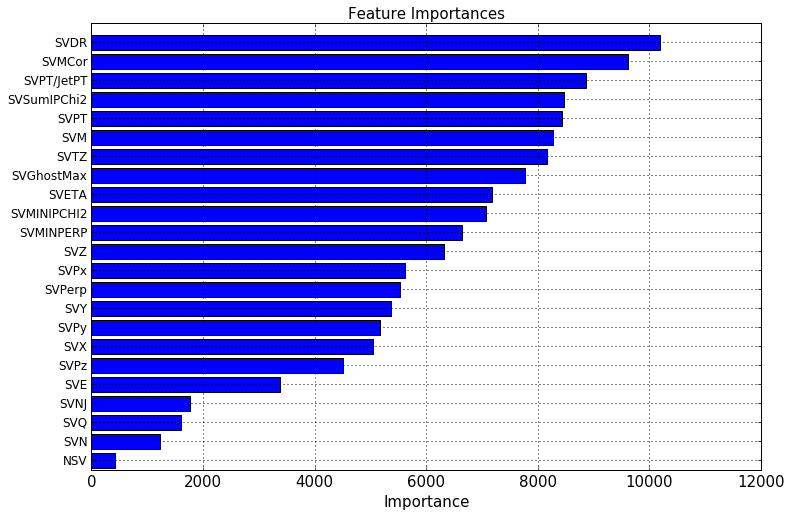

In [76]:
utils.plot_feature_importances(xgb1.feature_importances_, features1)

#### Make predictions

In [22]:
predictions1 = xgb1.predict_proba(test1.astype('float64'))
preds1 = {i: predictions1[:, i] for i in range(3)}

#### The model quality evaluation

     b jets    c jets  light jets
0  0.920848  0.887286    0.951293


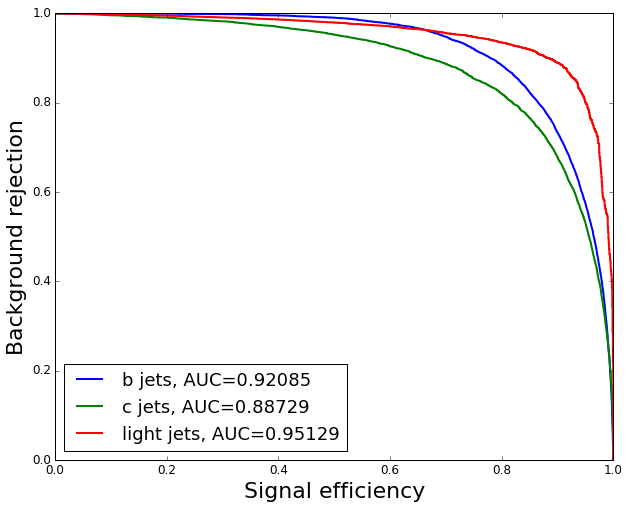

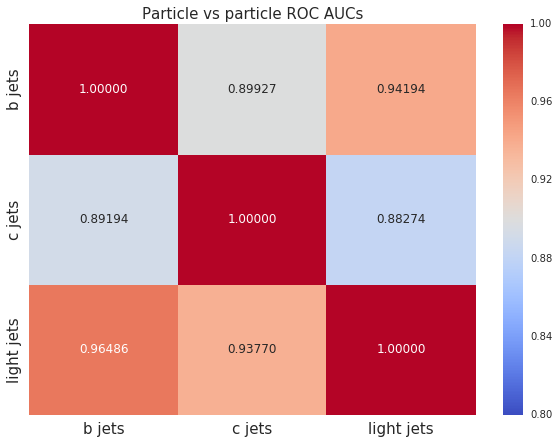

                 Eta        Pt
b jets      0.001068  0.001229
c jets      0.001346  0.001827
light jets  0.003937  0.009340


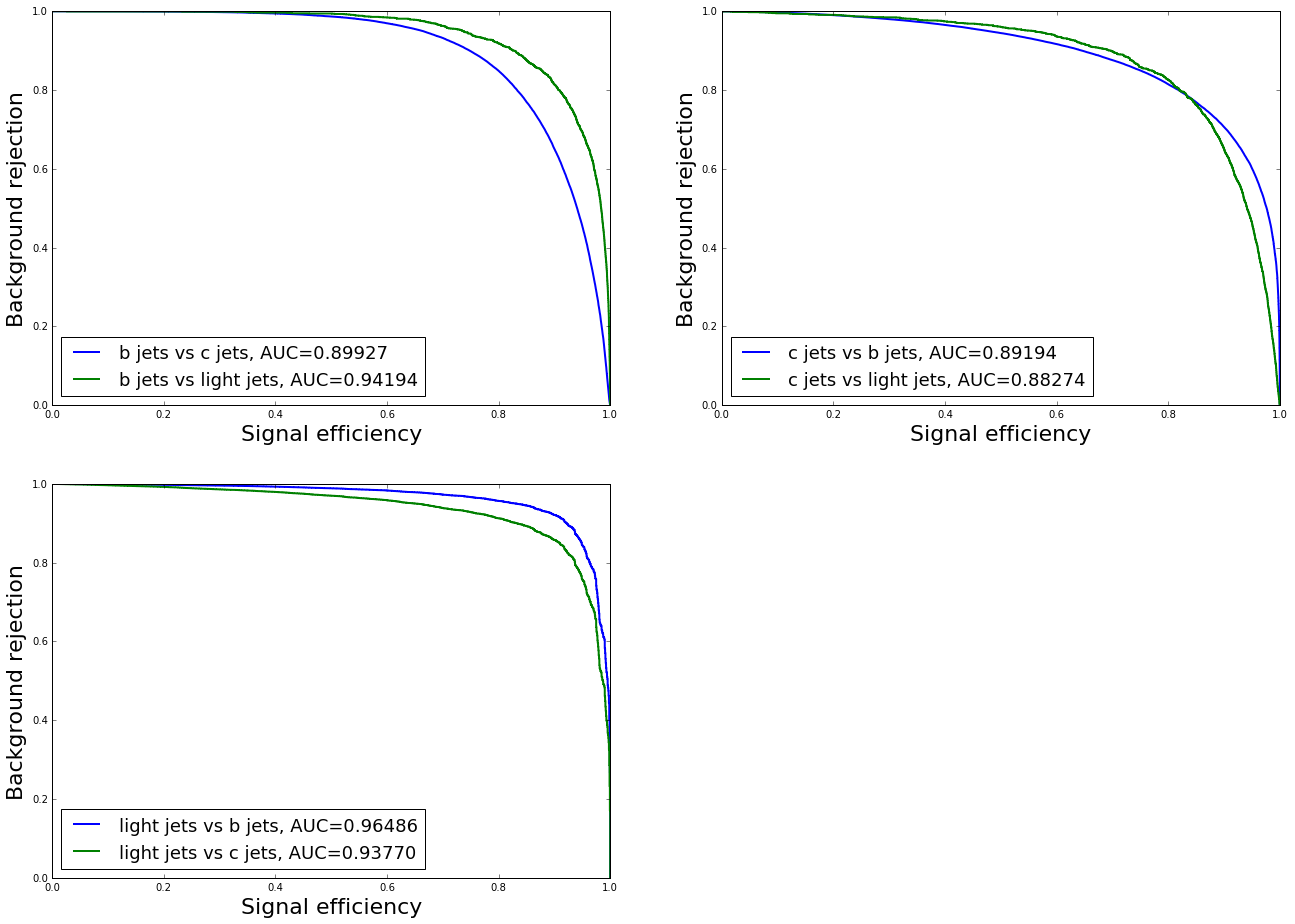

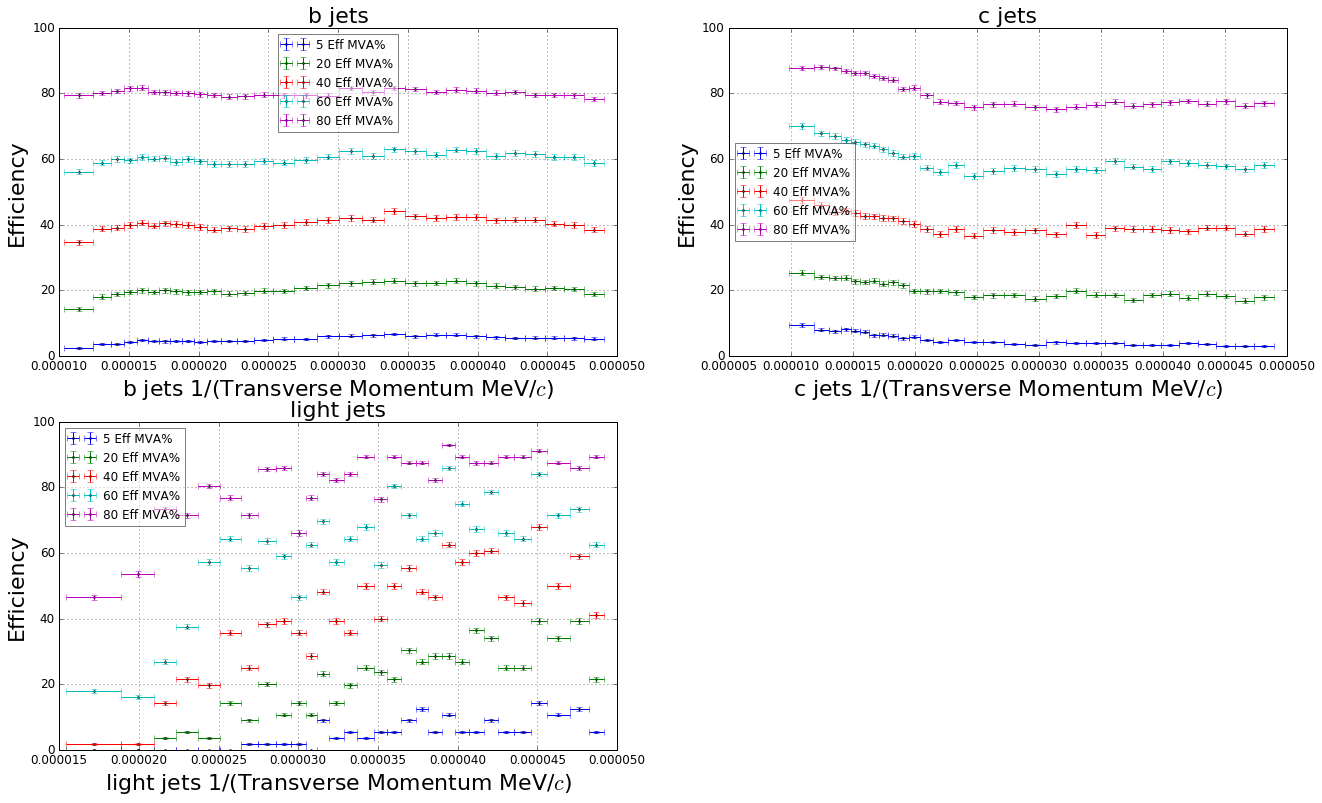

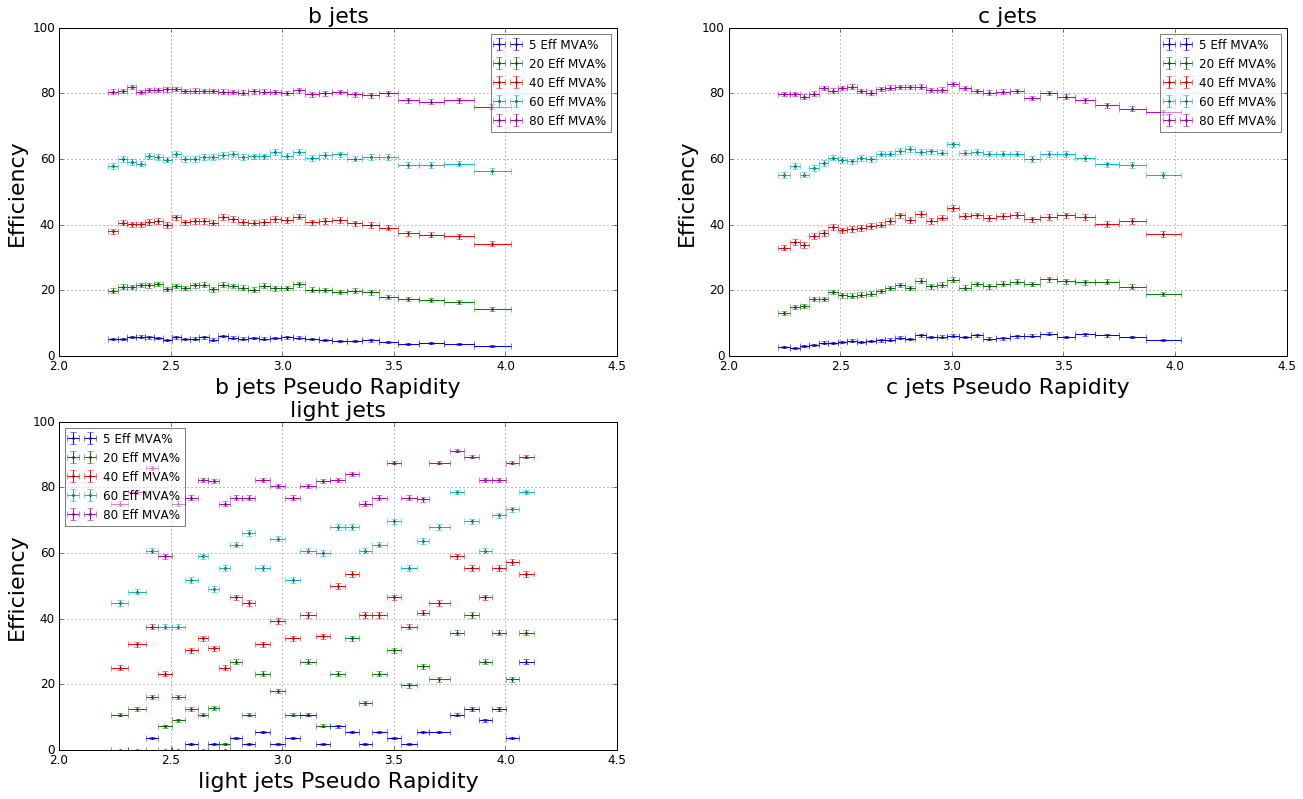

In [77]:
utils.generate_plots(preds1, test1.Label.values, test1.Weight.values, test1, path='output')

## SV+ tagger

An SV tagger that requires an SV in the jet but uses not only SV features, but also whatever else is useful.

#### Data Selection

In [24]:
sv_selection = '(TrueParton != -1000) & (NSV > 0)'

In [25]:
len(b_jets.query(sv_selection)), len(c_jets.query(sv_selection)), len(light_jets.query(sv_selection))

(740807, 288550, 5702)

In [26]:
data2 = pandas.concat([b_jets.query(sv_selection), c_jets.query(sv_selection), light_jets.query(sv_selection)], axis=0)
data2.head()

,TrueParton,TrueMaxBPT,TrueMaxCPT,TrueJetPx,TrueJetPy,TrueJetPz,TrueJetE,JetPT,JetEta,JetSigma1,...,NDispl9,NDispl16,MuPT,MuIPChi2,MuDR,MuPNN,NMu,HardPT,HardIPChi2,HardDR
0,5,17633.682312,6740.255618,-5755.97,-16674.51,515023.76,515349.118636,24319.124790,3.963454,0.167547,...,5,5,-1000,-1000,-1000,-1000,0,6490.685047,3034.382975,0.213897
1,5,14018.186474,7494.051081,25248.38,-6732.63,269911.29,271314.621876,23297.508840,3.005670,0.217980,...,4,4,-1000,-1000,-1000,-1000,0,2838.847081,486324.301619,0.051732
2,5,19639.972596,11968.533091,-19748.24,3521.12,89582.65,91888.056364,23719.662697,2.210880,0.170647,...,2,2,-1000,-1000,-1000,-1000,0,7316.954505,364.558259,0.138822
3,5,23047.556741,11952.634665,4457.80,-24709.15,169722.14,171713.585989,26006.902109,2.591552,0.123072,...,4,4,-1000,-1000,-1000,-1000,0,6009.983039,5697.853951,0.149840
5,5,22705.086617,15178.937919,-1314.14,25234.36,287425.77,288635.653309,29150.101859,3.143183,0.139819,...,6,4,-1000,-1000,-1000,-1000,0,5901.076491,379.628602,0.033013


#### Add new features

In [27]:
data2['SVPT/JetPT'] = data2.SVPT.values / data2.JetPT.values

#### Add Labels and Weights

In [28]:
data2['Label'] = [0] * len(b_jets.query(sv_selection)) + \
                 [1] * len(c_jets.query(sv_selection)) + \
                 [2] * len(light_jets.query(sv_selection))

data2['Weight'] = utils.compute_weights(data2['Label'].values)

#### Train, test splitting

In [29]:
from sklearn.model_selection import train_test_split
train2, test2 = train_test_split(data2, train_size=0.7, random_state=19)

In [30]:
print len(train2), len(test2)

724541 310518


In [31]:
numpy.unique(train2.Label.values)

array([0, 1, 2])

#### XGBoost training

In [32]:
from rep.estimators import XGBoostClassifier

features2=SV_features + ['NSV', 'SVPT/JetPT'] + jet_features + muon_features + hard_features + other_features

xgb2 = XGBoostClassifier(nthreads=12, 
                        eta=0.05, 
                        n_estimators=1000, 
                        max_depth=6, 
                        subsample=0.5, 
                        min_child_weight=10, 
                        features=features2, 
                        colsample=0.7)

In [33]:
%%time 
xgb2.fit(train2.astype('float64'), train2.Label.values, sample_weight=train2.Weight.values)

CPU times: user 5h 3min 15s, sys: 11.5 s, total: 5h 3min 26s
Wall time: 30min 37s


XGBoostClassifier(base_score=0.5, colsample=0.7, eta=0.05,
         features=['SVX', 'SVY', 'SVZ', 'SVPerp', 'SVPx', 'SVPy', 'SVPz', 'SVE', 'SVPT', 'SVETA', 'SVM', 'SVMCor', 'SVMINPERP', 'SVDR', 'SVN', 'SVNJ', 'SVQ', 'SVSumIPChi2', 'SVTZ', 'SVMINIPCHI2', 'SVGhostMax', 'NSV', 'SVPT/JetPT', 'JetPT', 'JetEta', 'JetSigma1', 'JetSigma2', 'JetQ', 'JetMult', 'JetNChr', 'JetNNeu', 'JetPTD', 'MuPT', 'MuIPChi2', 'MuDR', 'MuPNN', 'HardPT', 'HardIPChi2', 'HardDR', 'PVX', 'PVY', 'PVZ', 'NDispl6', 'NDispl9', 'NDispl16'],
         gamma=None, max_depth=6, min_child_weight=10, missing=-999.0,
         n_estimators=1000, nthreads=12, num_feature=None, random_state=0,
         scale_pos_weight=1.0, subsample=0.5, verbose=0)

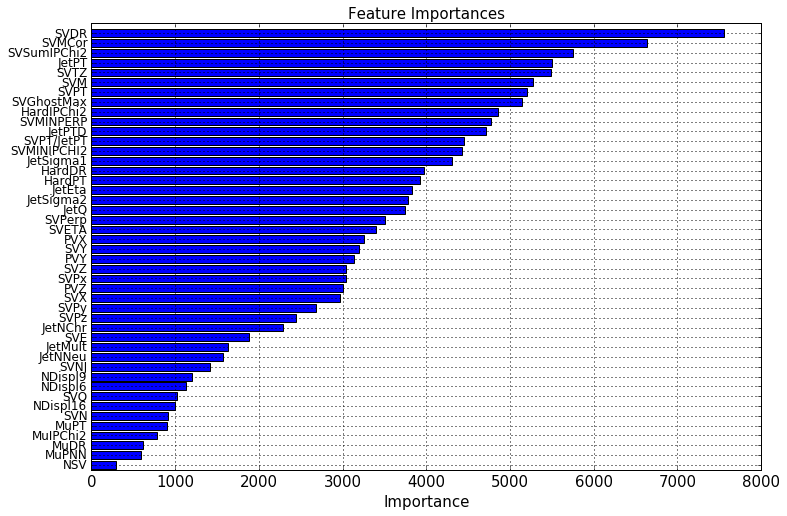

In [78]:
utils.plot_feature_importances(xgb2.feature_importances_, features2)

#### Make predictions

In [ ]:
predictions2 = xgb2.predict_proba(test2.astype('float64'))
preds2 = {i: predictions2[:, i] for i in range(3)}

#### The model quality evaluation

    b jets    c jets  light jets
0  0.93802  0.902324    0.963018


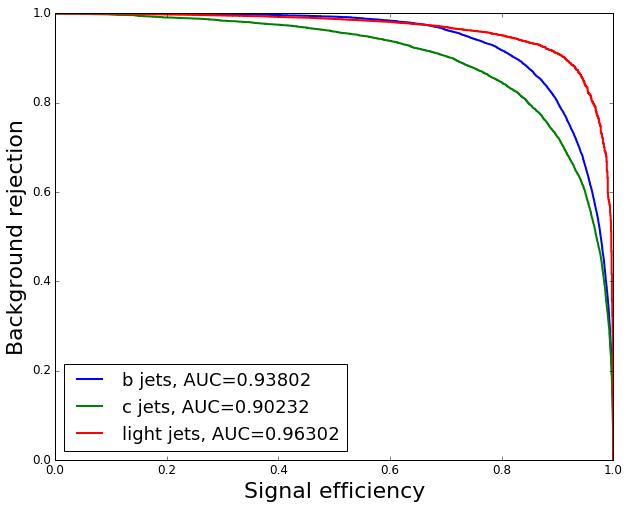

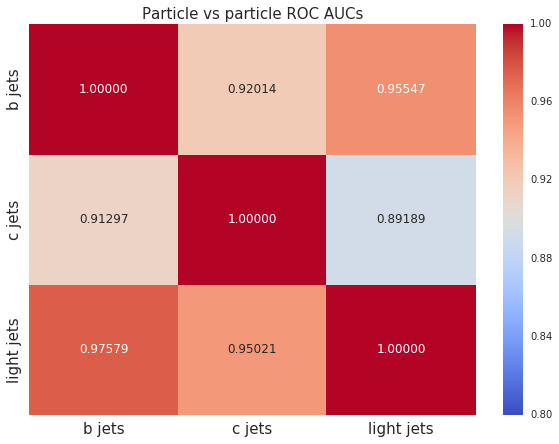

                 Eta        Pt
b jets      0.000956  0.001681
c jets      0.001270  0.001901
light jets  0.002634  0.005484


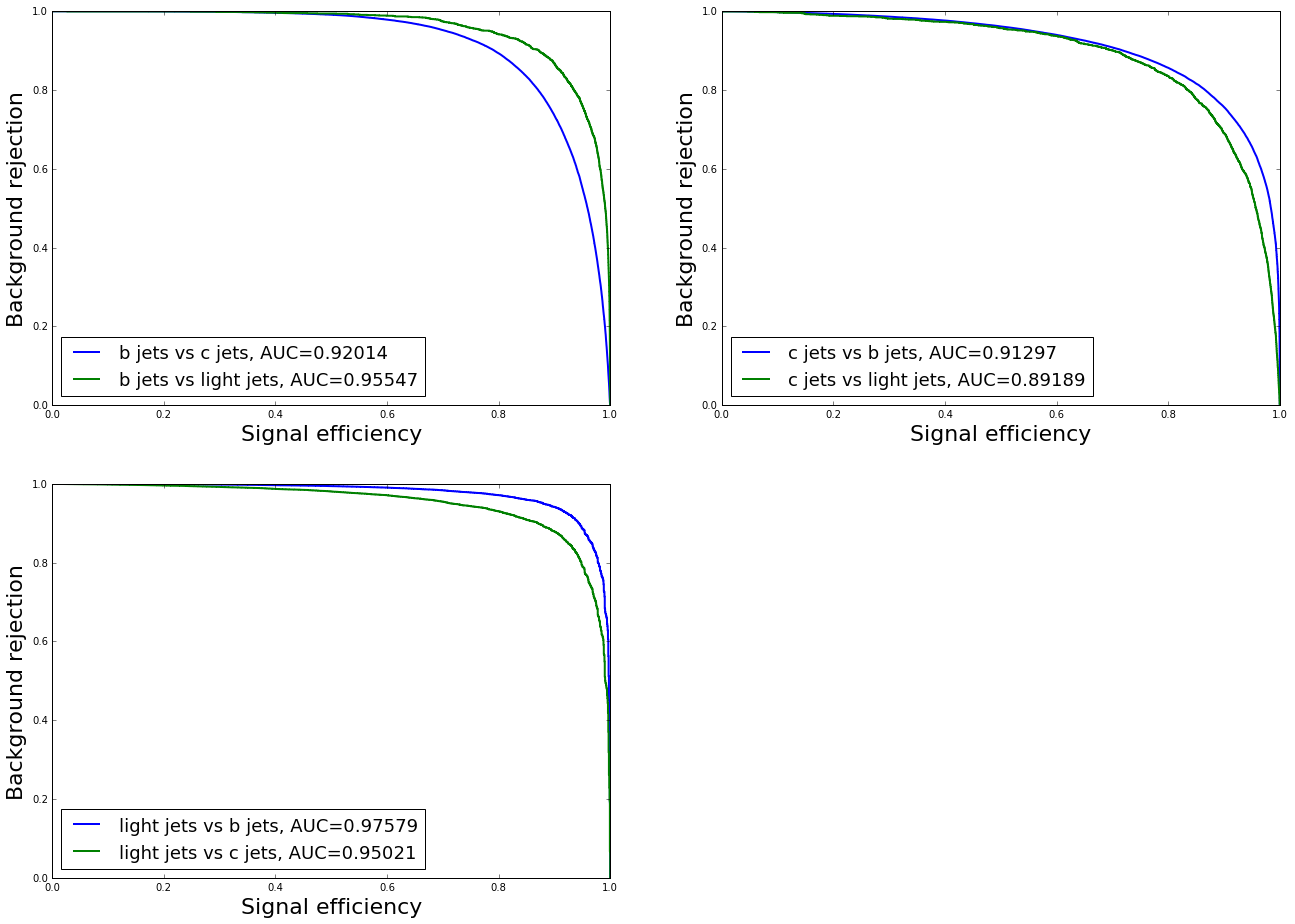

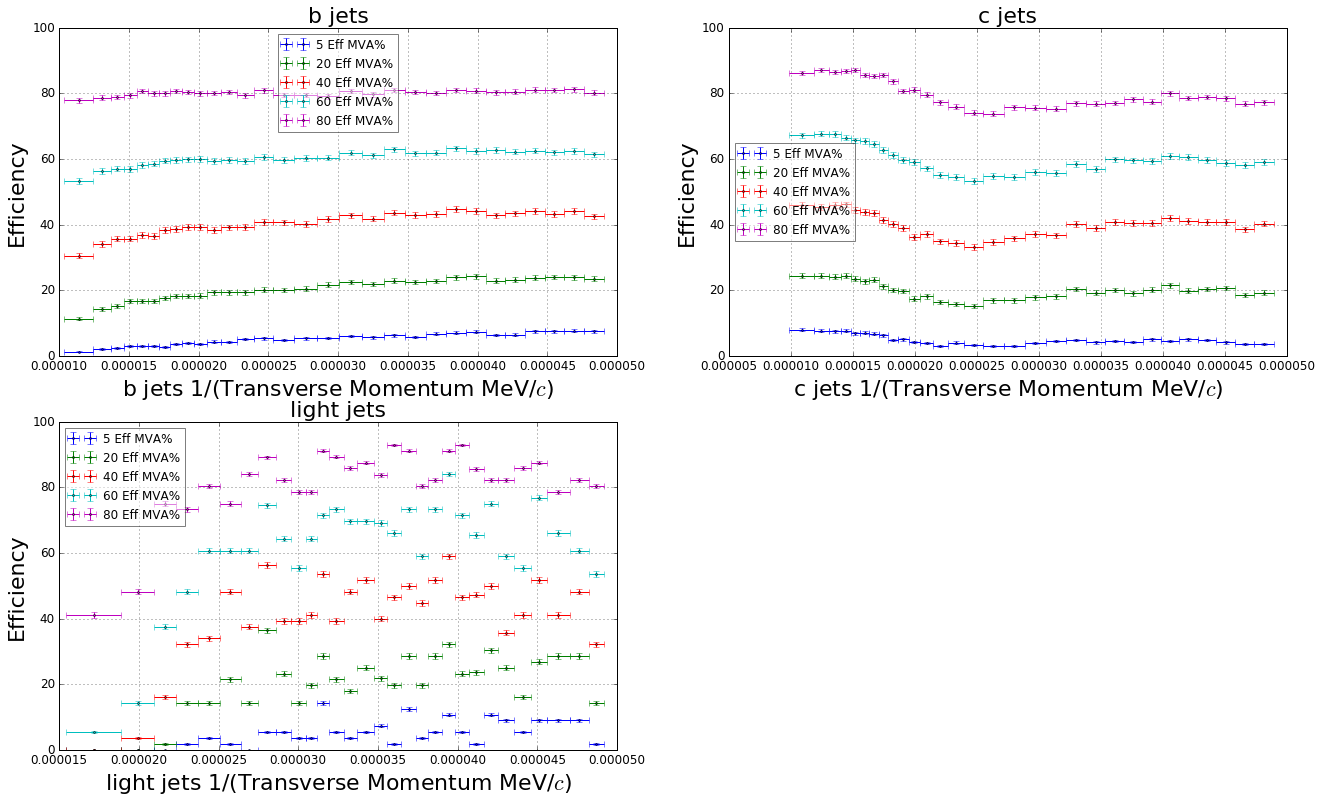

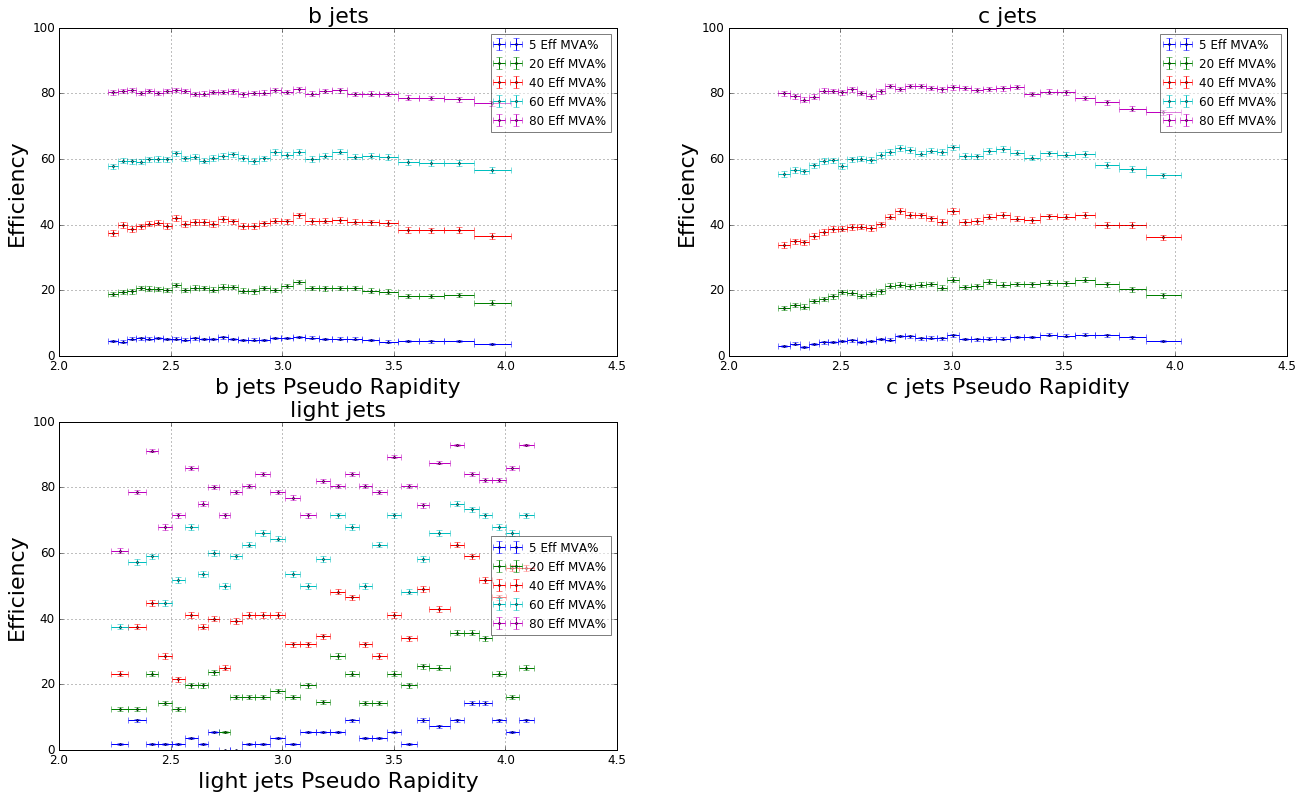

In [79]:
utils.generate_plots(preds2, test2.Label.values, test2.Weight.values, test2, path='output')

## Muon tagger

A muon tagger that requires a muon in the jet and uses only Mu features, along with MUPT / JetPT.

#### Data Selection

In [ ]:
muon_selection = '(TrueParton != -1000) & (NMu > 0)'

In [ ]:
len(b_jets.query(muon_selection)), len(c_jets.query(muon_selection)), len(light_jets.query(muon_selection))

In [ ]:
data3 = pandas.concat([b_jets.query(muon_selection), c_jets.query(muon_selection), light_jets.query(muon_selection)], axis=0)
data3.head()

#### Add new features

In [ ]:
data3['MuPT/JetPT'] = data3.MuPT.values / data3.JetPT.values

#### Add Labels and Weights

In [ ]:
data3['Label'] = [0] * len(b_jets.query(muon_selection)) + \
                 [1] * len(c_jets.query(muon_selection)) + \
                 [2] * len(light_jets.query(muon_selection))

data3['Weight'] = utils.compute_weights(data3['Label'].values)

#### Train, test splitting

In [ ]:
from sklearn.model_selection import train_test_split
train3, test3 = train_test_split(data3, train_size=0.7, random_state=19)

In [ ]:
print len(train3), len(test3)

In [ ]:
numpy.unique(train3.Label.values)

#### XGBoost training

In [ ]:
from rep.estimators import XGBoostClassifier

features3 = muon_features + ['NMu', 'MuPT/JetPT']

xgb3 = XGBoostClassifier(nthreads=12, 
                        eta=0.05, 
                        n_estimators=1000, 
                        max_depth=6, 
                        subsample=0.5, 
                        min_child_weight=10, 
                        features=features3, 
                        colsample=0.7)

In [ ]:
%%time 
xgb3.fit(train3.astype('float64'), train3.Label.values, sample_weight=train3.Weight.values)

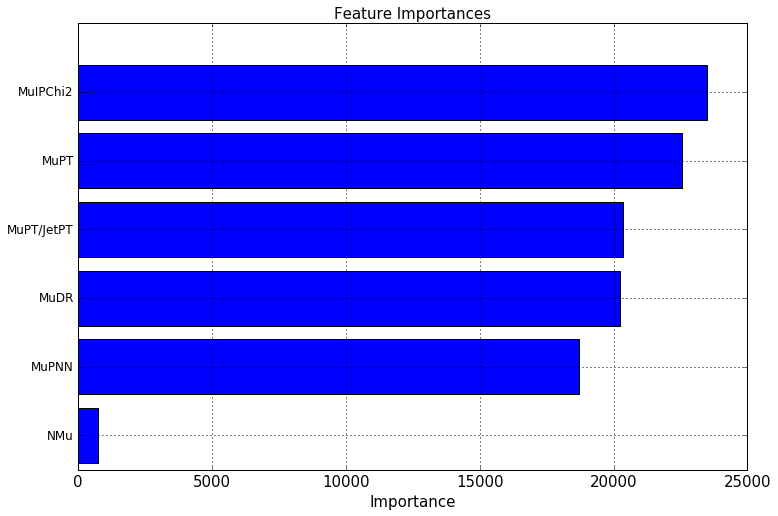

In [80]:
utils.plot_feature_importances(xgb3.feature_importances_, features3)

#### Make predictions

In [ ]:
predictions3 = xgb3.predict_proba(test3.astype('float64'))
preds3 = {i: predictions3[:, i] for i in range(3)}

#### The model quality evaluation

     b jets    c jets  light jets
0  0.847594  0.750081     0.89917


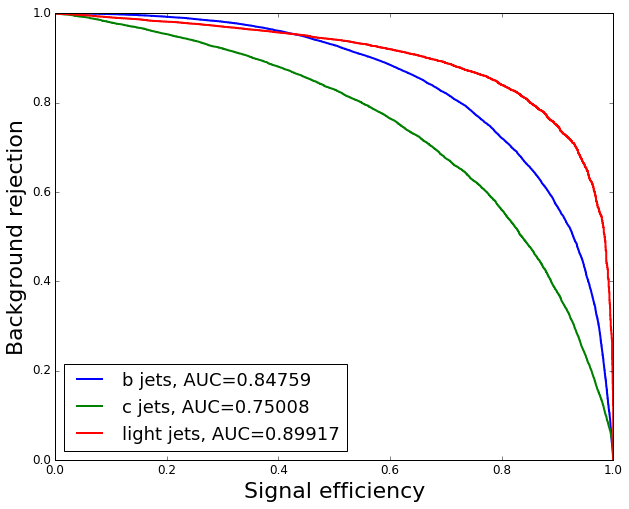

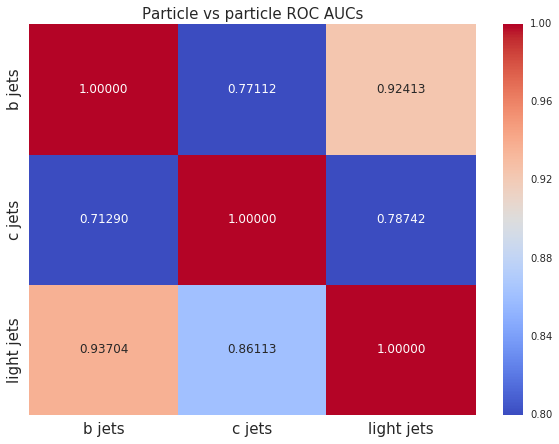

                 Eta        Pt
b jets      0.000876  0.001773
c jets      0.000917  0.013178
light jets  0.001124  0.017016


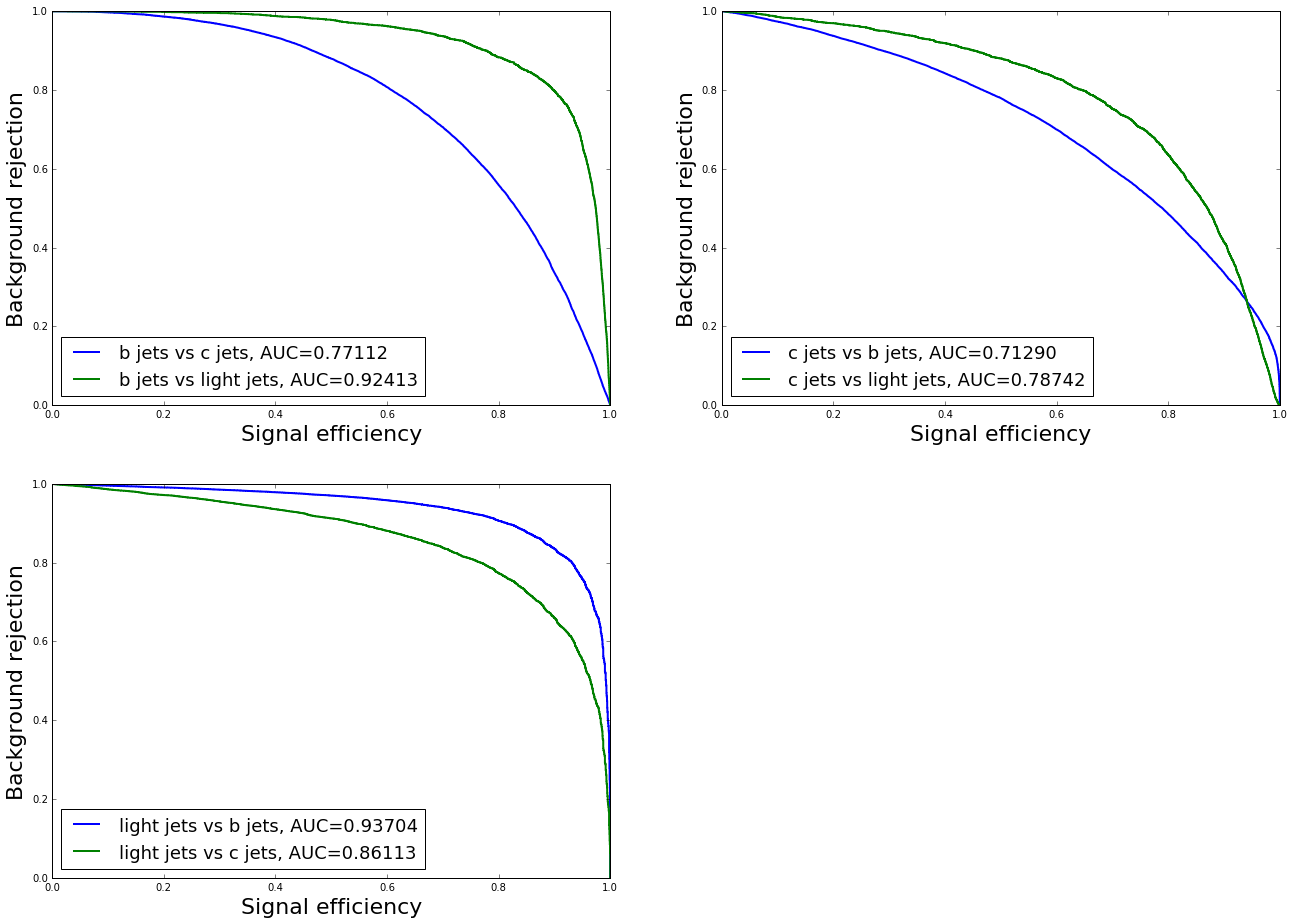

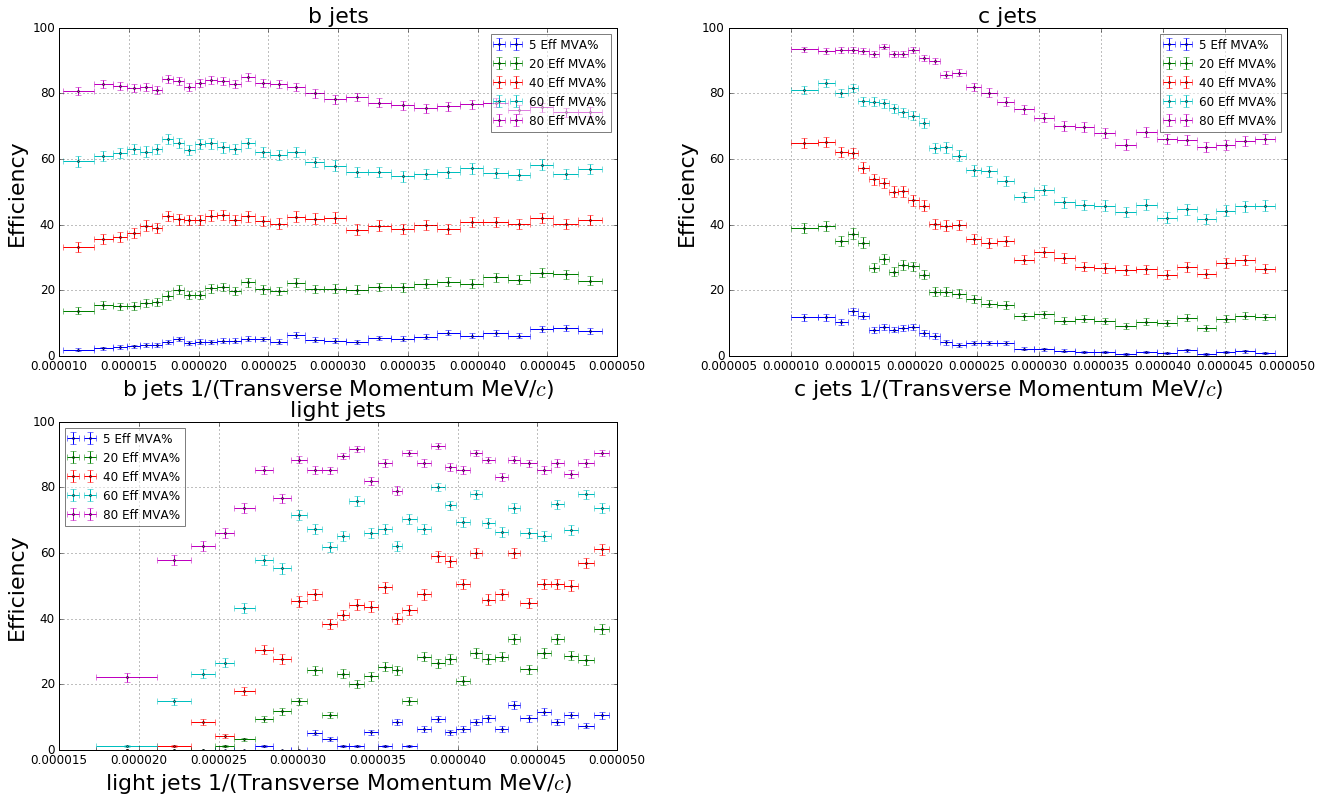

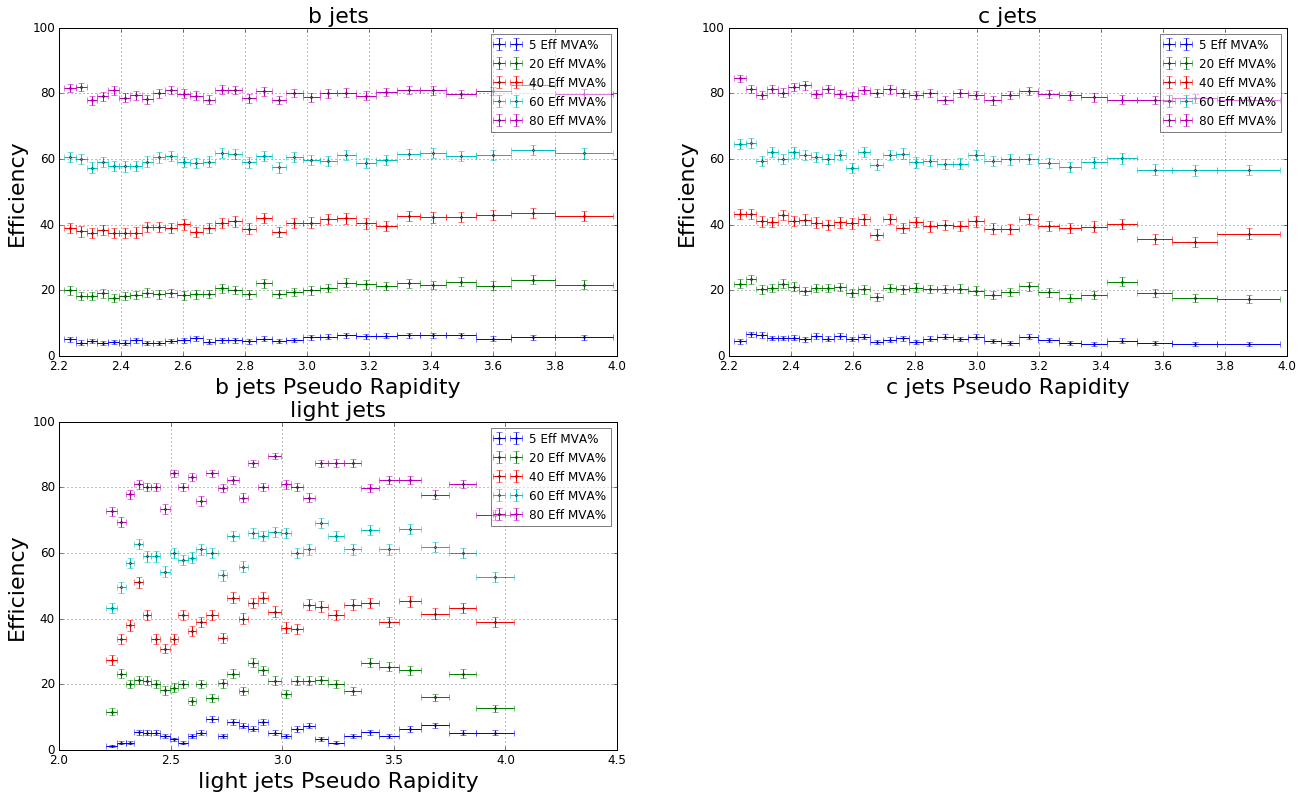

In [81]:
utils.generate_plots(preds3, test3.Label.values, test3.Weight.values, test3, path='output')

## Hardest tagger

A hardest-track tagger that uses features of the highest-pt track in the jet, along with HardPT / JetPT.

#### Data Selection

In [ ]:
hard_selection = '(TrueParton != -1000)'

In [ ]:
len(b_jets.query(hard_selection)), len(c_jets.query(hard_selection)), len(light_jets.query(hard_selection))

In [ ]:
data4 = pandas.concat([b_jets.query(hard_selection), c_jets.query(hard_selection), light_jets.query(hard_selection)], axis=0)
data4.head()

#### Add new features

In [ ]:
data4['HardPT/JetPT'] = data4.HardPT.values / data4.JetPT.values

#### Add Labels and Weights

In [ ]:
data4['Label'] = [0] * len(b_jets.query(hard_selection)) + \
                 [1] * len(c_jets.query(hard_selection)) + \
                 [2] * len(light_jets.query(hard_selection))

data4['Weight'] = utils.compute_weights(data4['Label'].values)

#### Train, test splitting

In [ ]:
from sklearn.model_selection import train_test_split
train4, test4 = train_test_split(data4, train_size=0.7, random_state=19)

In [ ]:
print len(train4), len(test4)

In [ ]:
numpy.unique(train4.Label.values)

#### XGBoost training

In [ ]:
from rep.estimators import XGBoostClassifier


features4=hard_features + ['HardPT/JetPT']

xgb4 = XGBoostClassifier(nthreads=12, 
                        eta=0.05, 
                        n_estimators=1000, 
                        max_depth=6, 
                        subsample=0.5, 
                        min_child_weight=10, 
                        features=features4, 
                        colsample=0.7)

In [ ]:
%%time 
xgb4.fit(train4.astype('float64'), train4.Label.values, sample_weight=train4.Weight.values)

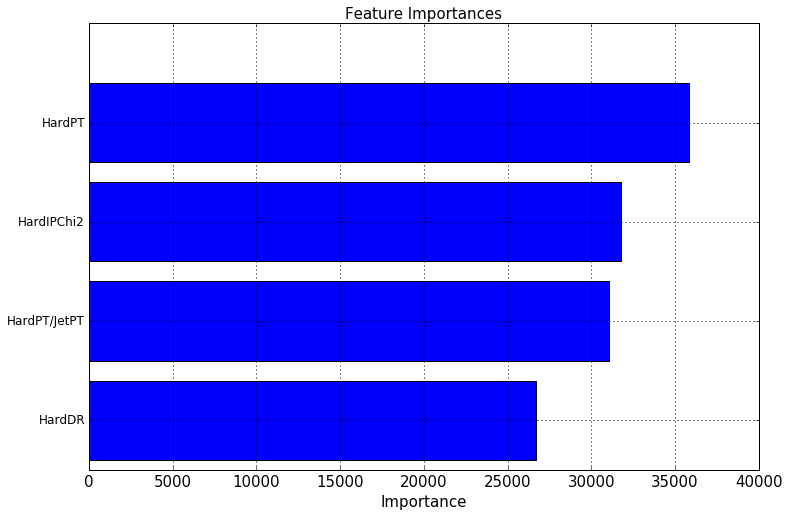

In [82]:
utils.plot_feature_importances(xgb4.feature_importances_, features4)

#### Make predictions

In [ ]:
predictions4 = xgb4.predict_proba(test4.astype('float64'))
preds4 = {i: predictions4[:, i] for i in range(3)}

#### The model quality evaluation

     b jets    c jets  light jets
0  0.800538  0.680068    0.834771


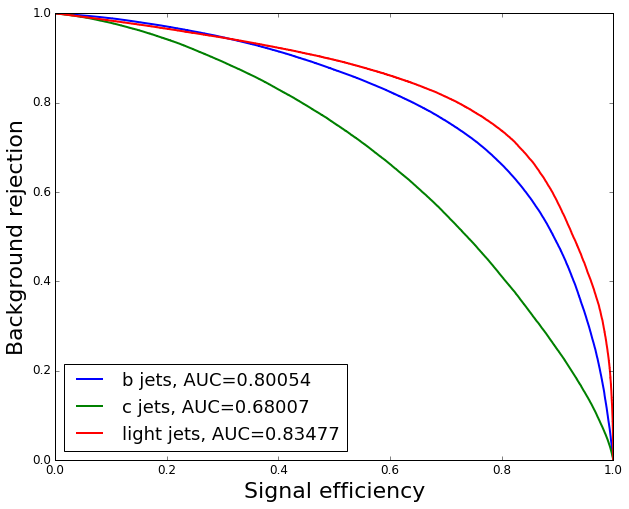

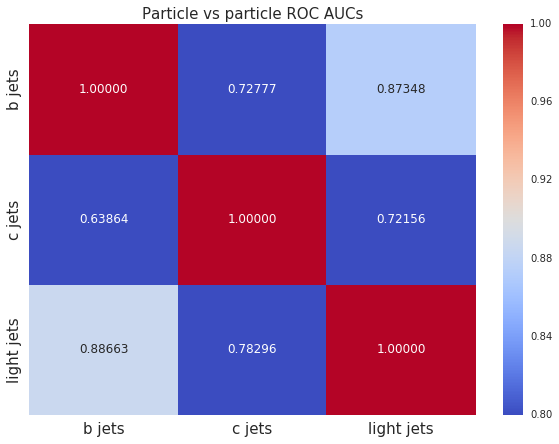

                 Eta        Pt
b jets      0.000971  0.003556
c jets      0.001350  0.033633
light jets  0.001272  0.018997


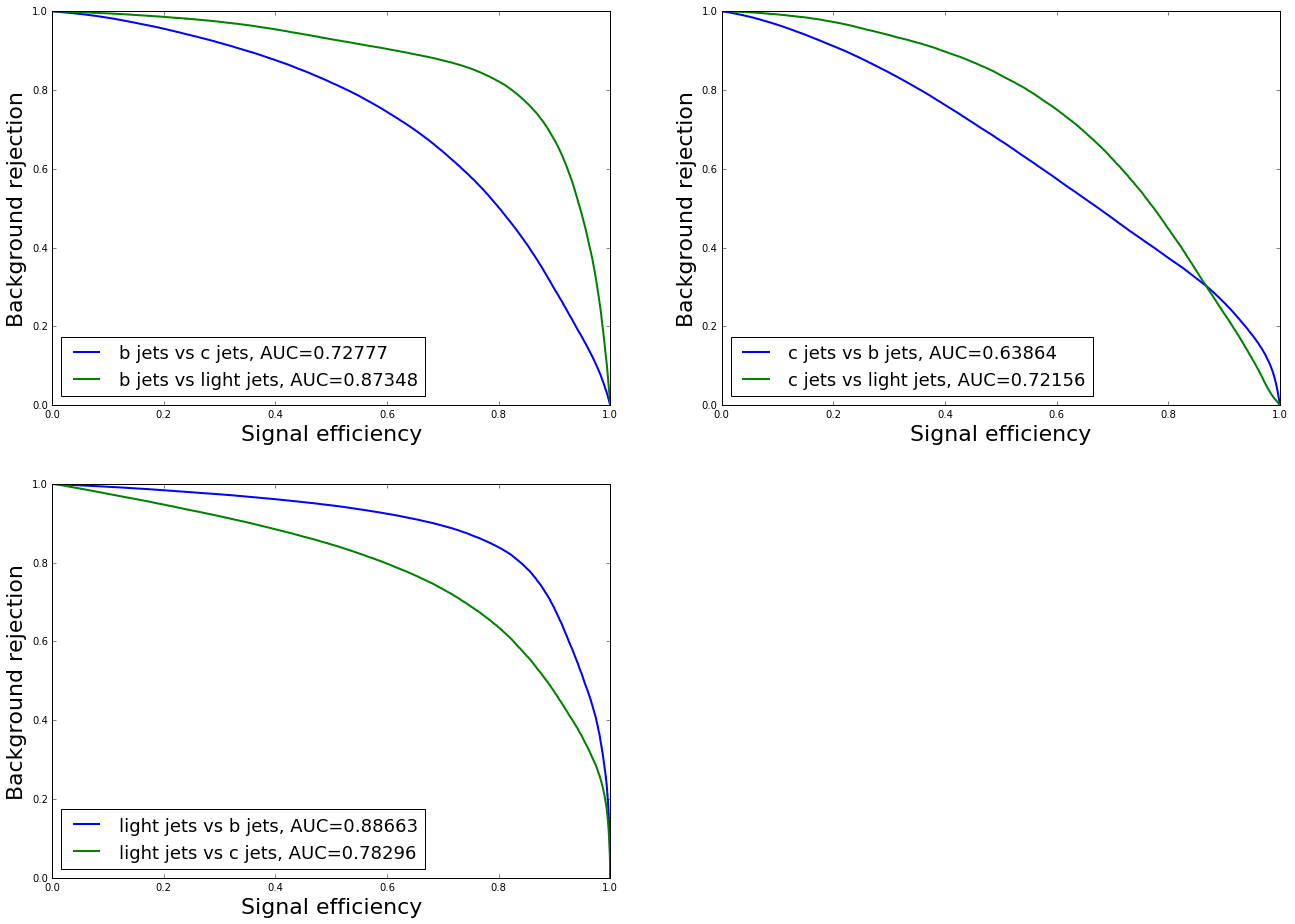

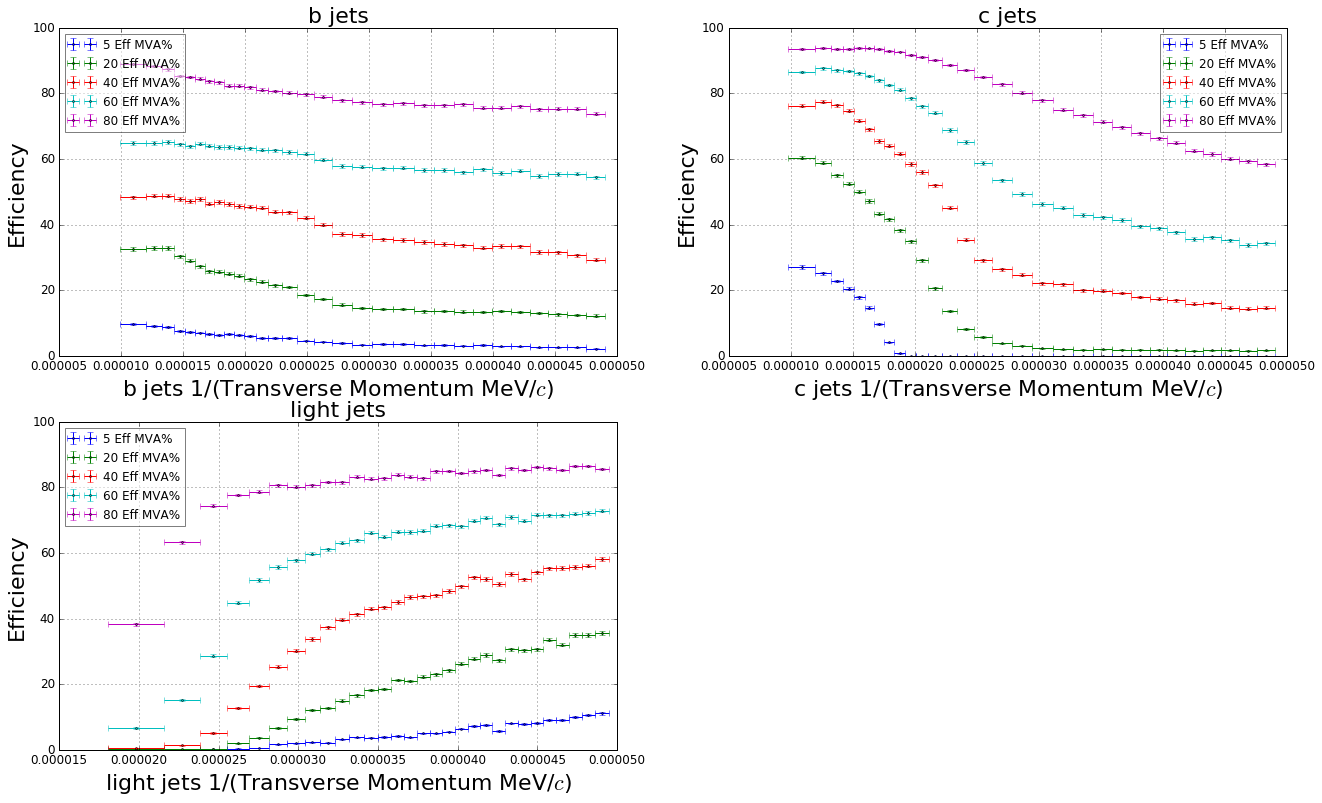

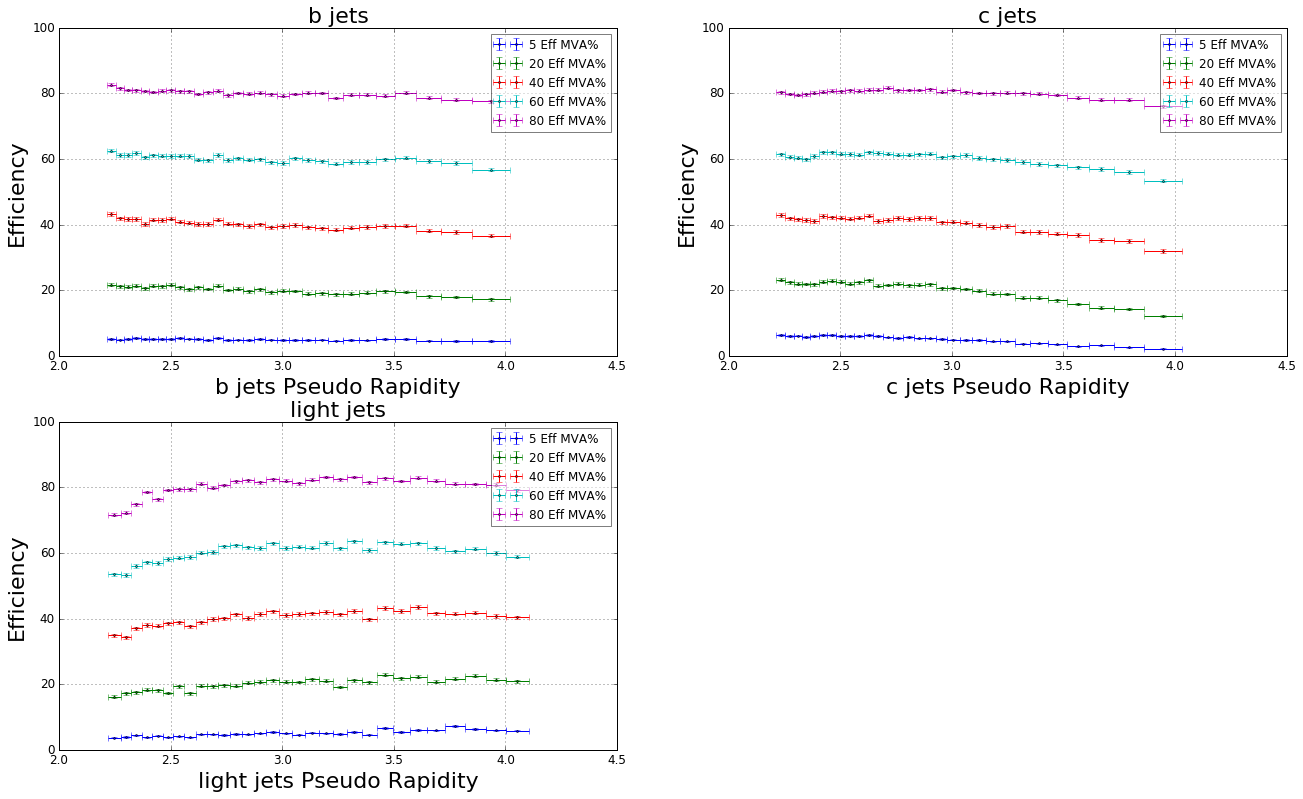

In [83]:
utils.generate_plots(preds4, test4.Label.values, test4.Weight.values, test4, path='output')

## Zero-SV tagger

A tagger that requires zero SVs, but can use whatever else is useful.

#### Data Selection

In [ ]:
zero_sv_selection = '(TrueParton != -1000) & (NSV == 0)'

In [ ]:
len(b_jets.query(zero_sv_selection)), len(c_jets.query(zero_sv_selection)), len(light_jets.query(zero_sv_selection))

In [ ]:
data5 = pandas.concat([b_jets.query(zero_sv_selection), c_jets.query(zero_sv_selection), light_jets.query(zero_sv_selection)], axis=0)
data5.head()

#### Add new features

In [ ]:
#

#### Add Labels and Weights

In [ ]:
data5['Label'] = [0] * len(b_jets.query(zero_sv_selection)) + \
                 [1] * len(c_jets.query(zero_sv_selection)) + \
                 [2] * len(light_jets.query(zero_sv_selection))

data5['Weight'] = utils.compute_weights(data5['Label'].values)

#### Train, test splitting

In [ ]:
from sklearn.model_selection import train_test_split
train5, test5 = train_test_split(data5, train_size=0.7, random_state=19)

In [ ]:
print len(train5), len(test5)

In [ ]:
numpy.unique(train5.Label.values)

#### XGBoost training

In [ ]:
from rep.estimators import XGBoostClassifier


features5=jet_features + muon_features + hard_features + other_features

xgb5 = XGBoostClassifier(nthreads=12, 
                        eta=0.05, 
                        n_estimators=1000, 
                        max_depth=6, 
                        subsample=0.5, 
                        min_child_weight=10, 
                        features=features5, 
                        colsample=0.7)

In [ ]:
%%time 
xgb5.fit(train5.astype('float64'), train5.Label.values, sample_weight=train5.Weight.values)

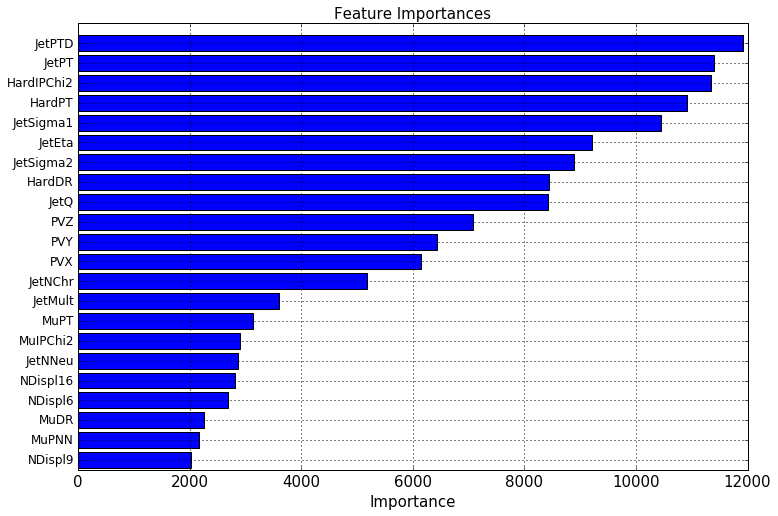

In [84]:
utils.plot_feature_importances(xgb5.feature_importances_, features5)

#### Make predictions

In [ ]:
predictions5 = xgb5.predict_proba(test5.astype('float64'))
preds5 = {i: predictions5[:, i] for i in range(3)}

#### The model quality evaluation

     b jets    c jets  light jets
0  0.840479  0.743037    0.873339


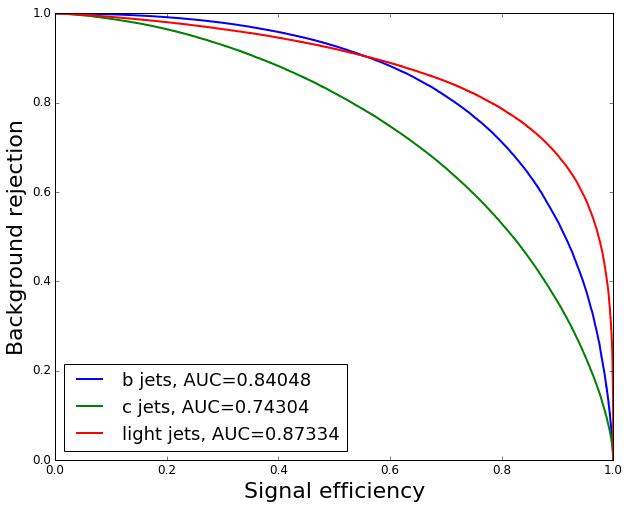

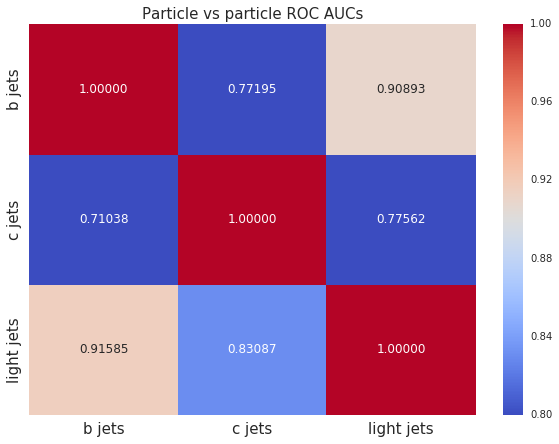

                 Eta        Pt
b jets      0.001455  0.011625
c jets      0.003617  0.029092
light jets  0.004199  0.015303


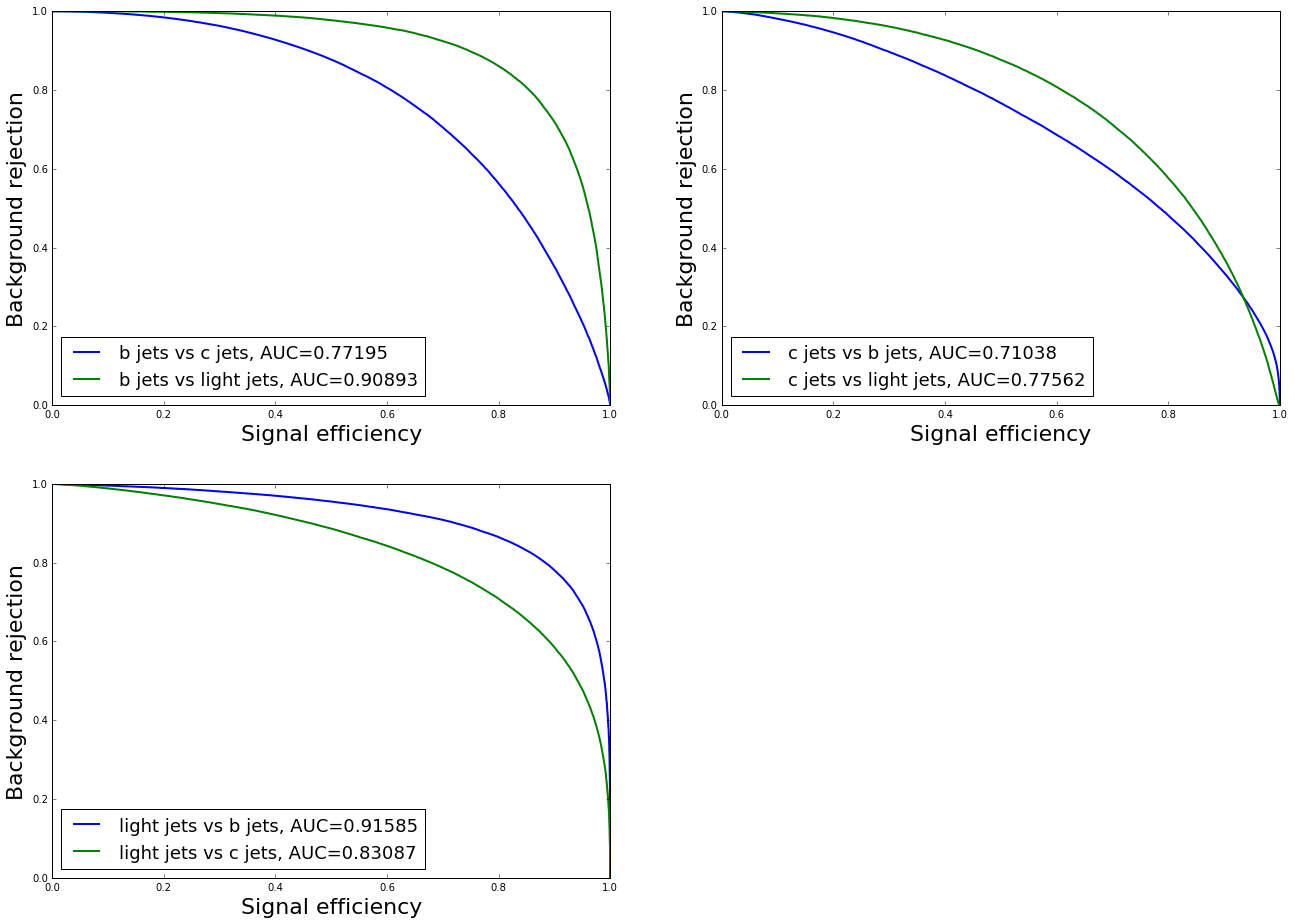

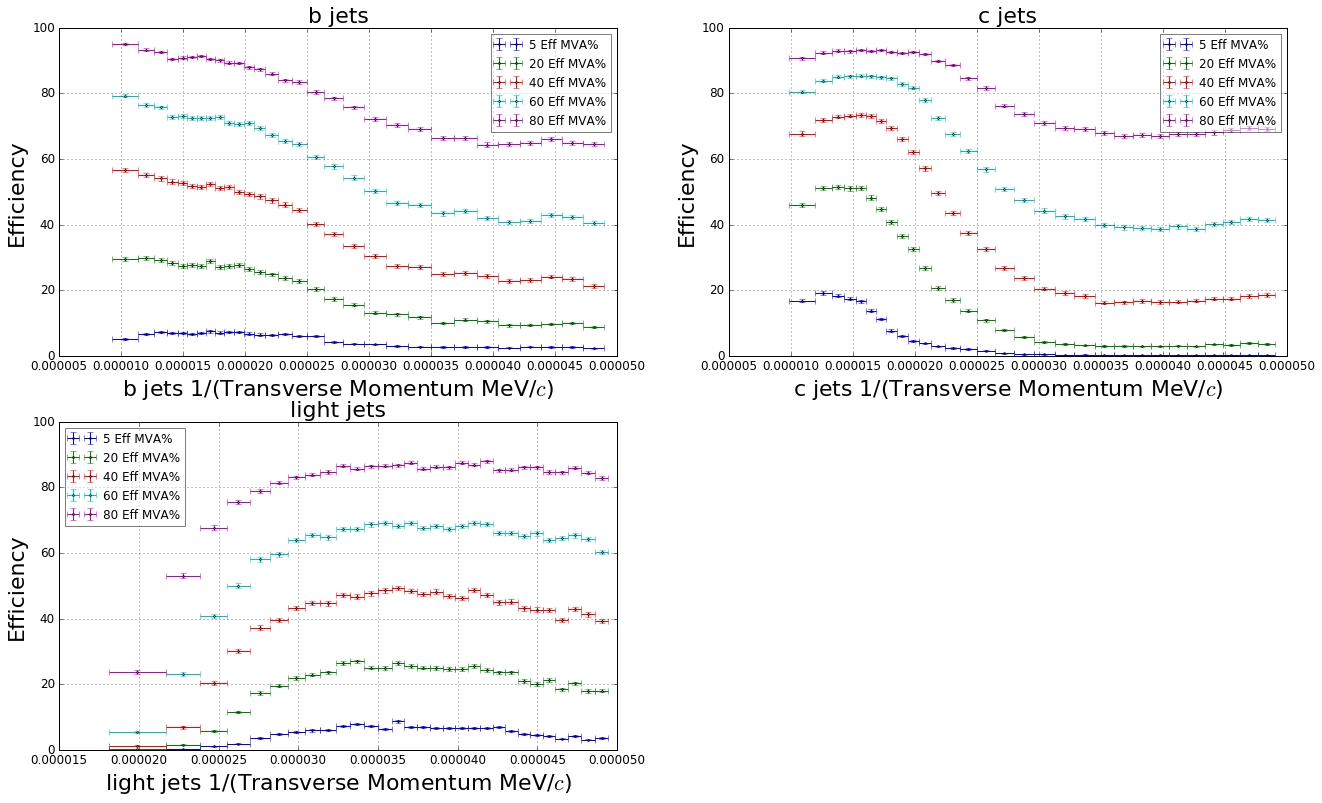

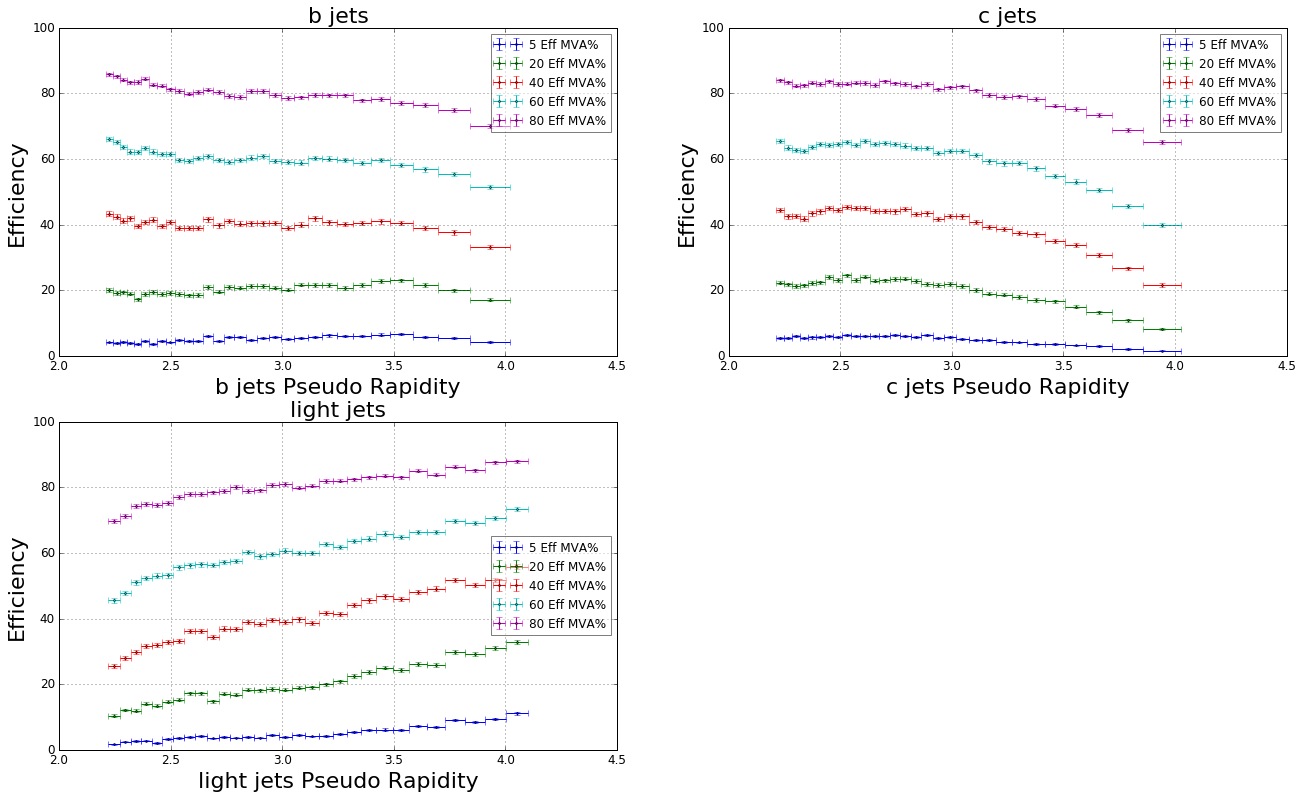

In [85]:
utils.generate_plots(preds5, test5.Label.values, test5.Weight.values, test5, path='output')